### Chargement des données 

In [4]:
import pandas as pd

# Chargement des données
file_path = r"C:\Users\seck\Documents\Projet Perso\Data Science\A-B Testing\A-B Testing\ab_data.csv"
data = pd.read_csv(file_path)

# Aperçu des données
data.head()




,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
print(data.info)
print("\Statistiques descriptives")
print(data.describe())
print("\Valeurs uniqes :")
print(data.nunique())

<bound method DataFrame.info of         user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[294478 rows x 5 co

### Vérification de la cohérence des données
Ajoutons une analyse pour vérifier si chaque groupe (control ou treatment) est associé à la bonne landing page (old_page ou new_page).

In [7]:
# Vérification des incohérences entre 'group' et 'landing_page'
inconsistent_rows = data[(data['group'] == 'control') & (data['landing_page'] != 'old_page') |
                         (data['group'] == 'treatment') & (data['landing_page'] != 'new_page')]

print(f"Nombre de lignes incohérentes : {len(inconsistent_rows)}")


Nombre de lignes incohérentes : 3893


### Suppression des lignes incohérentes
Si des incohérences sont détectées, nous les supprimons pour garantir une analyse fiable.

In [8]:
# Suppression des lignes incohérentes
data_cleaned = data[~((data['group'] == 'control') & (data['landing_page'] != 'old_page') |
                      (data['group'] == 'treatment') & (data['landing_page'] != 'new_page'))]

print(f"Nombre de lignes après nettoyage : {len(data_cleaned)}")


Nombre de lignes après nettoyage : 290585


In [13]:
data.columns.tolist()
pd.crosstab(data['group'],data['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


### Analyse des taux de conversion
Calculons le taux de conversion pour chaque groupe (control et treatment) pour avoir un aperçu initial des performances

In [9]:
# Taux de conversion par groupe
conversion_rates = data_cleaned.groupby('group')['converted'].mean()
print("\nTaux de conversion par groupe :")
print(conversion_rates)



Taux de conversion par groupe :
group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64


### Visualisation des taux de conversion

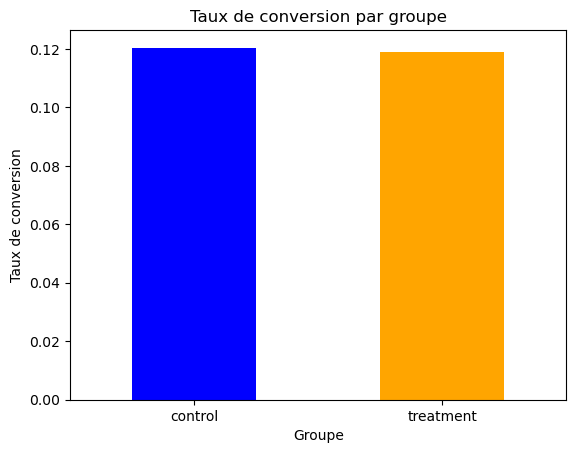

In [10]:
import matplotlib.pyplot as plt

# Visualisation des taux de conversion
conversion_rates.plot(kind='bar', color=['blue', 'orange'])
plt.title('Taux de conversion par groupe')
plt.xlabel('Groupe')
plt.ylabel('Taux de conversion')
plt.xticks(rotation=0)
plt.show()


### Tests statistiques
Ajoutons un test pour déterminer si la différence entre les taux de conversion des deux groupes est statistiquement significative. Pour cela, nous utilisons le ***test Z***

Le ***test Z*** pour proportions est utilisé ici parce que nous comparons deux proportions (le taux de conversion des deux groupes : control et treatment).

In [11]:
from statsmodels.stats.proportion import proportions_ztest

# Données pour le test Z
control_converted = data_cleaned[data_cleaned['group'] == 'control']['converted']
treatment_converted = data_cleaned[data_cleaned['group'] == 'treatment']['converted']

# Calcul des conversions et du nombre total d'observations par groupe
successes = [control_converted.sum(), treatment_converted.sum()]
n_obs = [control_converted.count(), treatment_converted.count()]

# Test Z
z_stat, p_value = proportions_ztest(successes, n_obs)
print("\nStatistique Z :", z_stat)
print("p-value :", p_value)



Statistique Z : 1.3116075339133115
p-value : 0.18965258971881804


### Conclusion : 
Si la p-value est inférieure à 0.05, on rejette l'hypothèse nulle (H0) et on conclut qu'il y a une différence significative entre les groupes.

Sinon, on accepte H0 et conclut qu'il n'y a pas de différence significative.

### Interprétation des Résultats

#### 1. **Statistique Z : 1.31**
La **statistique Z** mesure combien d'écarts-types sépare la différence observée entre les deux proportions de la différence attendue sous l'hypothèse nulle (\(H_0\)). Une valeur \(Z = 1.31\) n'est pas très élevée, ce qui suggère que la différence entre les taux de conversion des groupes "control" et "treatment" n'est pas significative.

#### 2. **p-value : 0.1896**
La **p-value** est de 0.1896. Si on utilise un seuil classique de signification de 0.05 (\(\alpha = 0.05\)) :
- \(p > 0.05\) : Nous **ne rejetons pas l'hypothèse nulle (\(H_0\))**. Cela signifie qu'il n'y a pas de preuve statistiquement significative que les taux de conversion entre les groupes "control" et "treatment" sont différents.

### Conclusion
Sur la base de ces résultats :
- **Aucune version (landing page)** n'a de performances significativement meilleures que l'autre en termes de taux de conversion.
- Les deux pages semblent statistiquement similaires pour convertir les utilisateurs.

